In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, sys
import yaml
from glob import glob
from calib import load_zdf_rgb, load_fuji_rgb, convert_16bit_to_8bit, find_chessboard_corners_zivid, find_chessboard_corners_fuji, calibrate_camera, visualize_calibration_result

In [2]:
calib_path = "../data/20221122/calib"

os.makedirs("../data/ref/", exist_ok=True)
os.makedirs("../data/ref/cb/", exist_ok=True)

In [3]:
calib_zivid_file = glob(os.path.join(calib_path, "*.zdf"))[0]
zivid_rgb = load_zdf_rgb(calib_zivid_file)
# plt.imshow(zivid_rgb)

Load zivid img with shape (1200, 1600, 3)


In [4]:
calib_fuji_file = glob(os.path.join(calib_path, "*.RAF"))
fuji_rgb1, fuji_rgb2 = load_fuji_rgb(calib_fuji_file[0]), load_fuji_rgb(calib_fuji_file[1])
fuji_rgb = np.max(np.stack([fuji_rgb1, fuji_rgb2], axis=0), axis=0)

fuji_rgb_8bit = convert_16bit_to_8bit(fuji_rgb)
# plt.imshow(fuji_rgb_8bit)

Load fuji img with shape (8733, 11644, 3)
Load fuji img with shape (8733, 11644, 3)


In [5]:
tlbr = [[111, 3], [1580, 1141]]
objpoints1, imgpoints1 = find_chessboard_corners_zivid(zivid_rgb, tlbr=tlbr)

ROI: (111, 3), (1580, 1141)


In [6]:
tlbr = [[3283, 1842], [7781, 5527]]
objpoints2, imgpoints2 = find_chessboard_corners_fuji(fuji_rgb_8bit, tlbr=tlbr)

ROI: (3283, 1842), (7781, 5527)


In [7]:
retval, k1, d1, k2, d2, R, T = calibrate_camera(objpoints1, imgpoints1, objpoints2, imgpoints2)

retval 0.6625470800120119


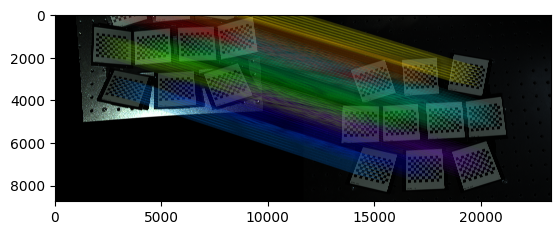

In [8]:
vis = visualize_calibration_result(zivid_rgb, fuji_rgb_8bit, k1, d1, k2, d2, R, T, imgpoints1, imgpoints2)
cv2.imwrite("../data/ref/cb/stereo.jpg", vis)
plt.imshow(vis)